### Do the following on titanic dataset.








In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns

### 1. Load the dataset into python environment

In [2]:
data=pd.read_csv('titanic_dataset.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2. Make ‘PassengerId’ as the index column

In [3]:
data.set_index('PassengerId', inplace=True)
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 3. Check the basic details of the dataset

In [4]:
data.shape

(891, 11)

In [5]:
data.size

9801

In [6]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [7]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
data['Age'].mean()

29.69911764705882

In [9]:
data.groupby(by='Sex')['Survived'].sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

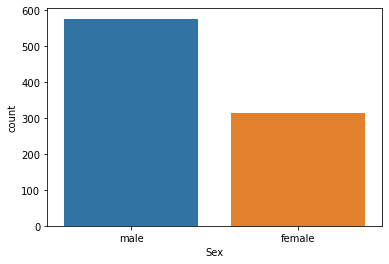

In [12]:
sns.countplot(x=data['Sex'])

<AxesSubplot:xlabel='Sex'>

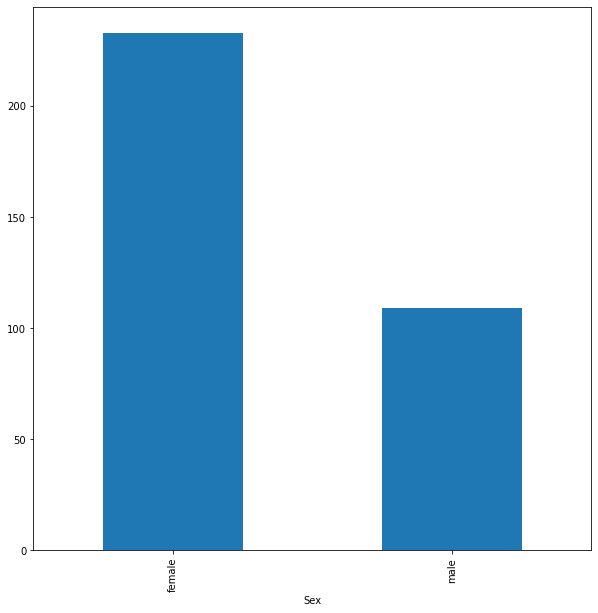

In [13]:
data['Survived'].sum()
data.groupby(by='Sex')['Survived'].sum().plot(kind='bar',figsize=(10,10))

<AxesSubplot:xlabel='Pclass', ylabel='count'>

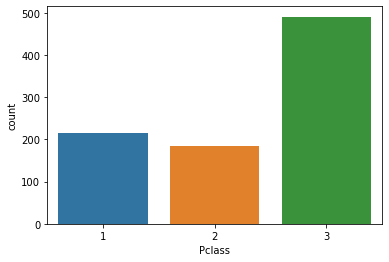

In [14]:
sns.countplot(x=data['Pclass'])

<AxesSubplot:xlabel='Embarked', ylabel='count'>

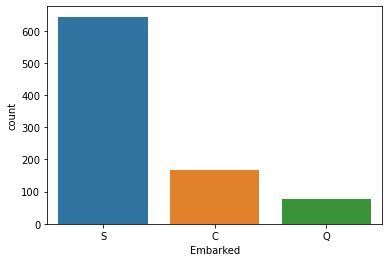

In [15]:
sns.countplot(x=data['Embarked'])

<AxesSubplot:xlabel='Age', ylabel='Sex'>

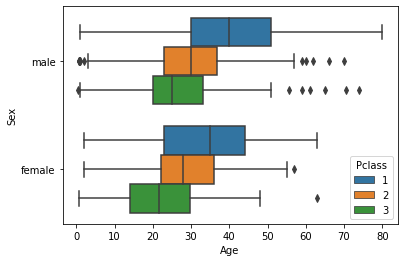

In [16]:
sns.boxplot(data=data, x='Age', y='Sex', hue ='Pclass')

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


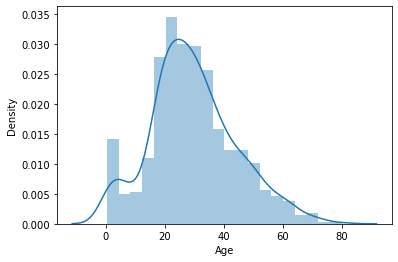

In [17]:
sns.distplot(data['Age'])
plt.show()

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

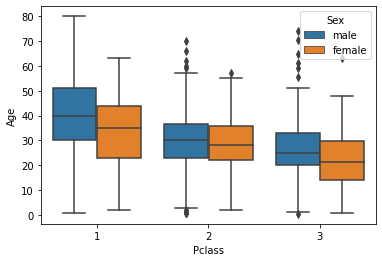

In [18]:
sns.boxplot(data=data, x='Pclass', y='Age', hue ='Sex')

There were 891 passengers, out of which only 233 female and 109 male passengers were survived. From the histogram above, it can be observed that most passengers in the Titanic were in the 20–40 age group. from this graph we can conclude that most of the passengers were travelled in 3rd class ticket. Most of the passengers were embarked from port s. From the given observations we can conclude that most of the upperclass passengers are of middle aged people than the other two classes

In [19]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 4. Fill in all the missing values present in all the columns in the dataset

In [30]:
frames1=[]
for i in range (0,4):
    p_class4=data[data['Pclass'] == i]
    p_class4=pd.DataFrame(p_class4)
    p_age4=p_class4.Age.mean()
    
    data4= p_class4.Age.fillna(p_age4)
    p_class4.Age=data4
    frames1.append(p_class4)
    frames1
    # p_class4

frames1 = np.array(frames1, dtype="object")

fr1=pd.DataFrame(frames1[1])  
fr2=pd.DataFrame(frames1[2]) 
fr3=pd.DataFrame(frames1[3]) 

fr4=[fr1,fr2,fr3]
r=pd.concat(fr4)
r



,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
...,...,...,...,...,...,...,...,...,...,...,...
883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q


In [31]:
r.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [32]:
New_data=r.drop(['Cabin'], axis=1)
New_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,S
24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,S


In [33]:
New_data['Embarked']=New_data['Embarked'].fillna(New_data['Embarked'].mode()[0])
New_data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

<AxesSubplot:ylabel='PassengerId'>

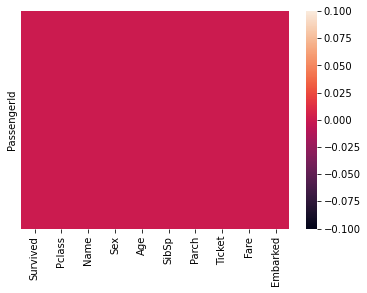

In [34]:
sns.heatmap(New_data.isnull(),yticklabels=False)

### 5. Check and handle outliers in at least 3 columns in the dataset

In [36]:
df=New_data[['Age','SibSp','Parch','Fare']]
df.head()

,Age,SibSp,Parch,Fare
PassengerId,,,,
2,38.0,1,0,71.2833
4,35.0,1,0,53.1000
7,54.0,0,0,51.8625
12,58.0,0,0,26.5500
24,28.0,0,0,35.5000


Text(0.5, 0, 'Outliers in Age,SibSp,Parch,Fare')

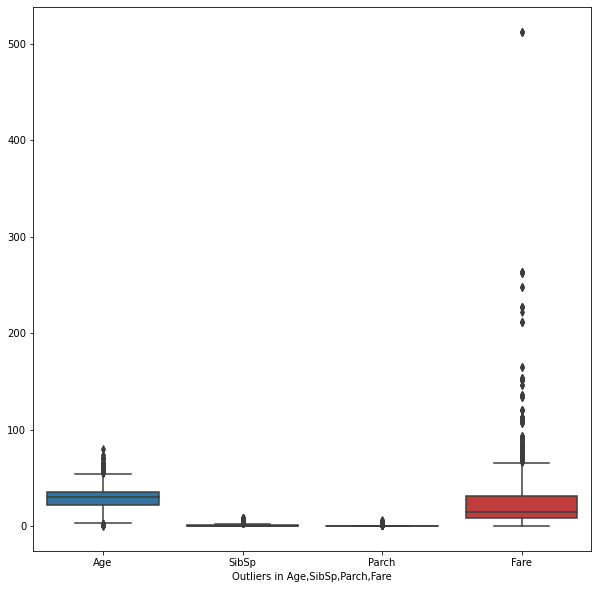

In [37]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df)
plt.xlabel('Outliers in Age,SibSp,Parch,Fare')

From this plot, we can say that there is so many outliers present in age,siblings/spouse, Parents/Chilndren and Fare column

In [38]:
# Handling Outliers in Fare column
Q1=np.percentile(New_data['Fare'],30,interpolation='midpoint')
Q2=np.percentile(New_data['Fare'],60,interpolation='midpoint')
Q3=np.percentile(New_data['Fare'],90,interpolation='midpoint')


print(Q1)
print(Q2)
print(Q3)

8.05
21.6792
77.9583


In [39]:
IQR=Q3-Q1
low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR
print(low_limit)
print(up_limit)

-96.81245
182.82074999999998


In [40]:
outlier=[]
for x in New_data['Fare']:
    if((x> up_limit) or (x<low_limit)):
        outlier.append(x)
outlier

[263.0,
 263.0,
 247.5208,
 512.3292,
 247.5208,
 262.375,
 263.0,
 211.5,
 227.525,
 263.0,
 221.7792,
 227.525,
 512.3292,
 211.3375,
 227.525,
 227.525,
 211.3375,
 512.3292,
 262.375,
 211.3375]

In [41]:
ind=New_data['Fare']>up_limit
New_data.loc[ind].index

Int64Index([ 28,  89, 119, 259, 300, 312, 342, 378, 381, 439, 528, 558, 680,
            690, 701, 717, 731, 738, 743, 780],
           dtype='int64', name='PassengerId')

In [42]:
New_data.drop([28,  89, 119, 259, 300, 312, 342, 378, 381, 439, 528, 558, 680,
            690, 701, 717, 731, 738, 743, 780],inplace=True)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Outliers in Fare')

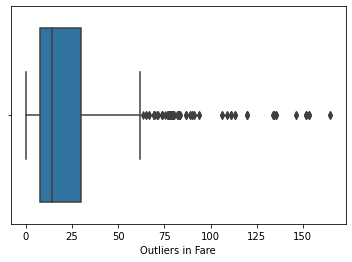

In [43]:
sns.boxplot(New_data['Fare'])
plt.xlabel("Outliers in Fare")

In [44]:
# Handling Outliers in Siblings/Spouse column
Q1=np.percentile(New_data['SibSp'],30,interpolation='midpoint')
Q2=np.percentile(New_data['SibSp'],60,interpolation='midpoint')
Q3=np.percentile(New_data['SibSp'],90,interpolation='midpoint')


print(Q1)
print(Q2)
print(Q3)

0.0
0.0
1.0


In [45]:
IQR=Q3-Q1
low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR
print(low_limit)
print(up_limit)

-1.5
2.5


In [46]:
outlier=[]
for x in New_data['SibSp']:
    if((x> up_limit) or (x<low_limit)):
        outlier.append(x)
outlier

[3,
 3,
 4,
 3,
 4,
 5,
 3,
 4,
 5,
 3,
 4,
 8,
 4,
 4,
 3,
 8,
 4,
 8,
 3,
 4,
 4,
 4,
 4,
 8,
 3,
 5,
 3,
 5,
 3,
 4,
 4,
 3,
 3,
 5,
 4,
 4,
 8,
 4,
 3,
 4,
 8,
 4,
 8]

In [47]:
ind=New_data['SibSp']>up_limit
New_data.loc[ind].index

Int64Index([727,   8,  17,  25,  51,  60,  64,  69,  72,  86, 120, 160, 165,
            172, 177, 181, 183, 202, 230, 234, 262, 267, 279, 325, 375, 387,
            410, 481, 486, 542, 543, 635, 643, 684, 687, 788, 793, 814, 820,
            825, 847, 851, 864],
           dtype='int64', name='PassengerId')

In [48]:
New_data.drop([727,   8,  17,  25,  51,  60,  64,  69,  72,  86, 120, 160, 165,
            172, 177, 181, 183, 202, 230, 234, 262, 267, 279, 325, 375, 387,
            410, 481, 486, 542, 543, 635, 643, 684, 687, 788, 793, 814, 820,
            825, 847, 851, 864],inplace=True)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SibSp'>

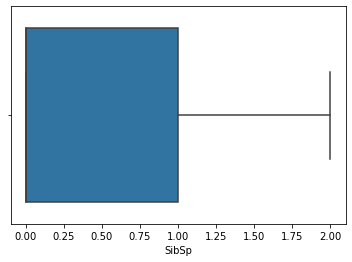

In [49]:
sns.boxplot(New_data['SibSp'])

In [50]:
# Handling Outliers in Parents/Children column
Q1=np.percentile(New_data['Parch'],30,interpolation='midpoint')
Q2=np.percentile(New_data['Parch'],60,interpolation='midpoint')
Q3=np.percentile(New_data['Parch'],90,interpolation='midpoint')


print(Q1)
print(Q2)
print(Q3)

0.0
0.0
1.0


In [51]:
IQR=Q3-Q1
low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR
print(low_limit)
print(up_limit)

-1.5
2.5


In [52]:
outlier=[]
for x in New_data['Parch']:
    if((x> up_limit) or (x<low_limit)):
        outlier.append(x)
outlier

[3, 3, 5, 5, 3, 4, 4, 4, 5, 5, 6, 3, 3, 5]

In [53]:
ind=New_data['Parch']>up_limit
New_data.loc[ind].index

Int64Index([438, 775, 14, 26, 87, 168, 361, 568, 611, 639, 679, 737, 859, 886], dtype='int64', name='PassengerId')

In [54]:
New_data.drop([438, 775, 14, 26, 87, 168, 361, 568, 611, 639, 679, 737, 859, 886],inplace=True)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Parch'>

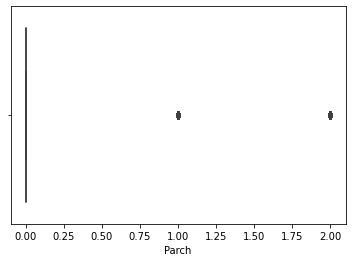

In [55]:
sns.boxplot(New_data['Parch'])

### 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [56]:
from sklearn.preprocessing import MinMaxScaler

In [57]:
New_data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

In [58]:
New_data=pd.get_dummies(New_data,columns=['Sex'],drop_first=True)

In [59]:
New_data.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_male
PassengerId,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,S,0
7,0,1,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,S,1
12,1,1,"Bonnell, Miss. Elizabeth",58.0,0,0,113783,26.5500,S,0
24,1,1,"Sloper, Mr. William Thompson",28.0,0,0,113788,35.5000,S,1


In [60]:
X=New_data.drop(['Ticket','Survived','Name','Embarked'],axis=1)

In [61]:
X.describe()

,Pclass,Age,SibSp,Parch,Fare,Sex_male
count,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000
mean,2.296069,30.307948,0.304668,0.239558,25.900741,0.665848
std,0.831164,12.660402,0.523074,0.550395,29.996558,0.471983
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,23.000000,0.000000,0.000000,7.895800,0.000000
50%,3.000000,30.000000,0.000000,0.000000,13.000000,1.000000
75%,3.000000,35.000000,1.000000,0.000000,27.540600,1.000000
max,3.000000,80.000000,2.000000,2.000000,164.866700,1.000000


In [62]:
Y=New_data['Survived']

In [63]:
scaler = MinMaxScaler()
print(scaler.fit(X))
MinMaxScaler()
print(scaler.data_max_)

MinMaxScaler()
[  3.      80.       2.       2.     164.8667   1.    ]


In [64]:
print(scaler.transform(X))

[[0.         0.4722292  0.5        0.         0.4323693  0.        ]
 [0.         0.43453129 0.5        0.         0.32207838 0.        ]
 [0.         0.67328474 0.         0.         0.31457232 1.        ]
 ...
 [1.         0.30887158 0.         0.         0.04276182 1.        ]
 [1.         0.20206082 0.5        1.         0.14223612 0.        ]
 [1.         0.39683338 0.         0.         0.04700767 1.        ]]


In [65]:
Scaled_data=pd.DataFrame(scaler.transform(X))

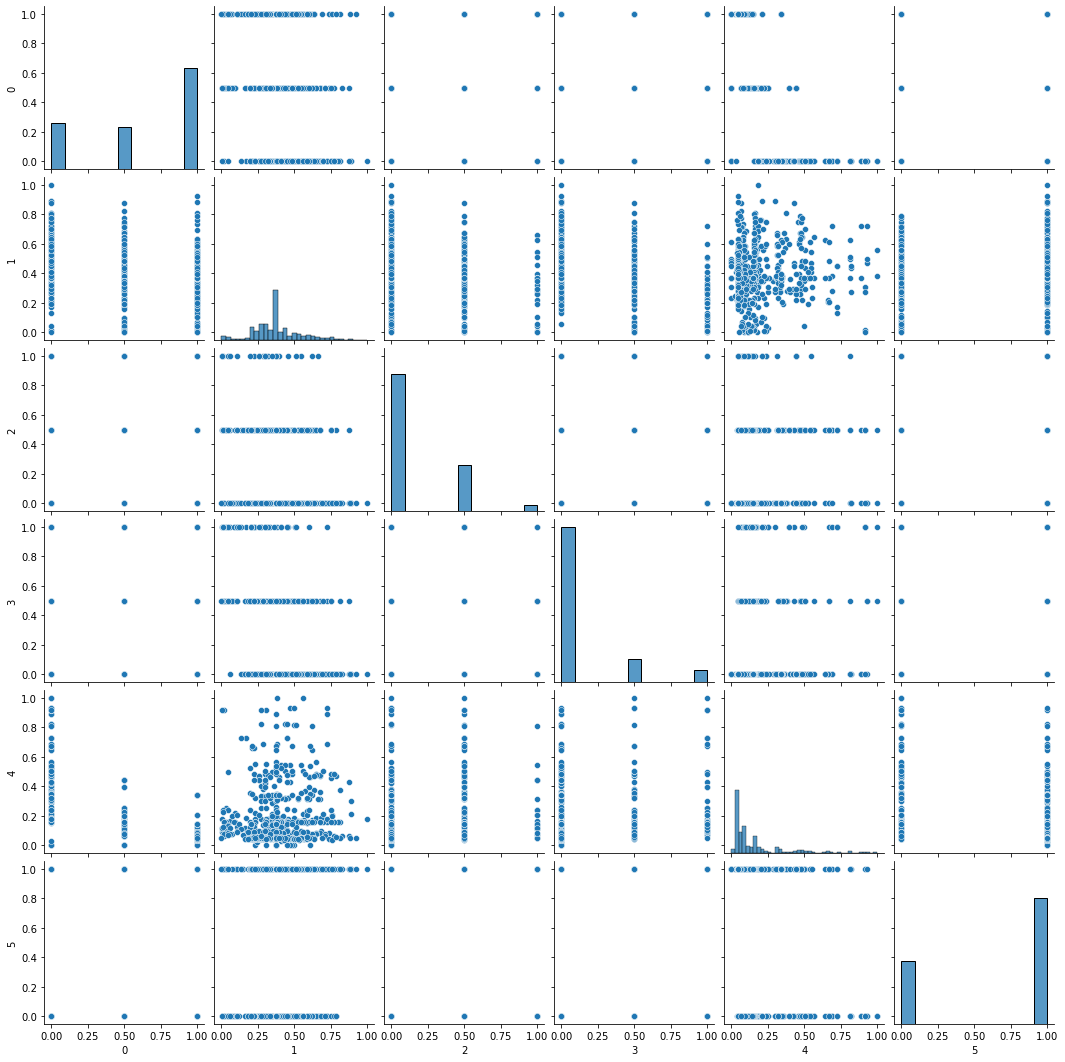

In [67]:
sns.pairplot(Scaled_data)